#**What You're Aiming For**

In this checkpoint, we are going to work on the 'Financial Inclusion in Africa' dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.


#**Instructions**

 1. Install the necessary packages
 2. Import you data and perform basic data exploration phase
  - Display general information about the dataset
  - Create a pandas profiling reports to gain insights into the dataset
  - Handle Missing and corrupted values
  - Remove duplicates, if they exist
  - Handle outliers, if they exist
  - Encode categorical features

3. Based on the previous data exploration train and test a machine learning classifier
4. Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form
5. Import your ML model into the streamlit application and start making predictions given the provided features values
6. Deploy your application on Streamlit share:
  - Create a github and a streamlit share accounts
  - Create a new git repo
  - Upload your local code to the newly created git repo
  - Log in to your streamlit account an deploy your application from the git repo


#**Introduction**
Financial inclusion is a critical driver for economic development, especially in developing regions. Access to financial services such as banking, savings, credit, and insurance enables individuals and businesses to participate fully in the economy, fostering personal growth and financial stability. However, despite its importance, many individuals across Africa remain unbanked, lacking access to essential financial services. This project focuses on examining financial inclusion in East Africa, using data from the Zindi platform's "Financial Inclusion in Africa" challenge. By leveraging this dataset, which includes demographic information and financial service usage data for around 33,600 individuals, we aim to predict the likelihood of individuals having or using a bank account. The insights drawn from this analysis can aid policymakers and financial institutions in creating strategies to expand financial inclusion effectively.

#**Problem Statement**
In East Africa, a significant portion of the population lacks access to basic financial services, posing challenges to economic growth and individual financial security. Understanding the factors influencing financial service adoption, particularly bank account ownership, can be instrumental in addressing this gap. Using machine learning, this project seeks to identify demographic and behavioral factors that most strongly predict an individual's likelihood of holding a bank account. By doing so, we aim to support efforts in developing targeted solutions to expand financial inclusivity across East Africa.

#**Objectives**
1. **Data Exploration and Preparation:** To explore and preprocess the dataset, ensuring it is clean and structured for accurate analysis and modeling.
2. **Feature Analysis:** To identify key demographic and behavioral factors that influence the likelihood of an individual having a bank account.
3. **Model Development:** To develop and evaluate a machine learning model capable of accurately predicting bank account ownership.
4. **Insights and Recommendations:** To provide actionable insights for policymakers and financial institutions to help improve financial inclusion strategies in East Africa.

# Step 0: Imports and Reading Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/content/Financial_inclusion_dataset.csv')

# Step 1: Data Understanding
 - Dataframe shape
 - head and tail
 - dtypes
 - describe

In [3]:
df.shape # Displays of rows and columns

(23524, 13)

In [4]:
df.head() # Displays the first 5 rows of the dataset

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [6]:
df.dtypes

,0
country,object
year,int64
uniqueid,object
bank_account,object
location_type,object
cellphone_access,object
household_size,int64
age_of_respondent,int64
gender_of_respondent,object
relationship_with_head,object


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


# Step 2: Data Preparation
 - Create a pandas profiling reports to gain insights into the dataset.
 - Handle Missing and corrupted values.
 - Remove duplicates, if they exist.
 - Dropping irrelevant columns and rows.

In [8]:
!pip install -U ydata-profiling
from ydata_profiling import ProfileReport

#generating the report
profile = ProfileReport(df, title=' Financial Inclusion Pandas profiling Report')
#saving the report to  a notebook
profile.to_notebook_iframe()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2d62c925e3b78213b264a90c7db5d3143944755e79680bb1ea78d99f675227a2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# checking for missing values
df.isnull().sum()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


*No missing values*

In [10]:
df.duplicated().sum()

0

*Zero duplicates*

#Step 3: Identifing and Removing Outliers
- Handling outlires
- Checking for outliers
- Handling the outliers using Winsorization Method


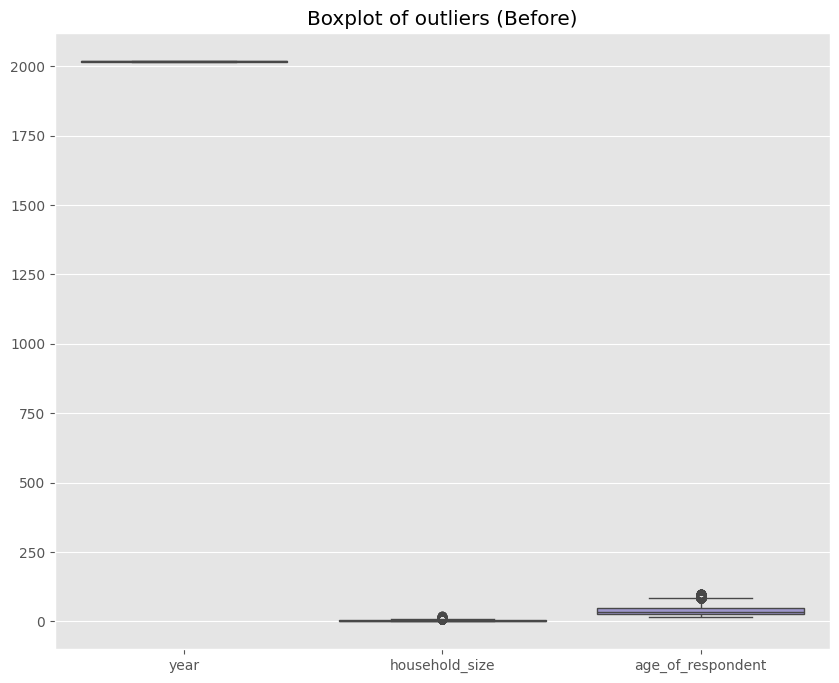

In [11]:
# checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
# plotting for outliers in numeric columns

plt.figure(figsize=(10,8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Boxplot of outliers (Before)')
plt.show()


*Handling the outliers using the Winsorize method*

In [12]:
from scipy.stats.mstats import winsorize
df['household_size']= winsorize(df['household_size'],limits=[0.02,0.02])
df['age_of_respondent']= winsorize(df['age_of_respondent'],limits=[0.02,0.02])

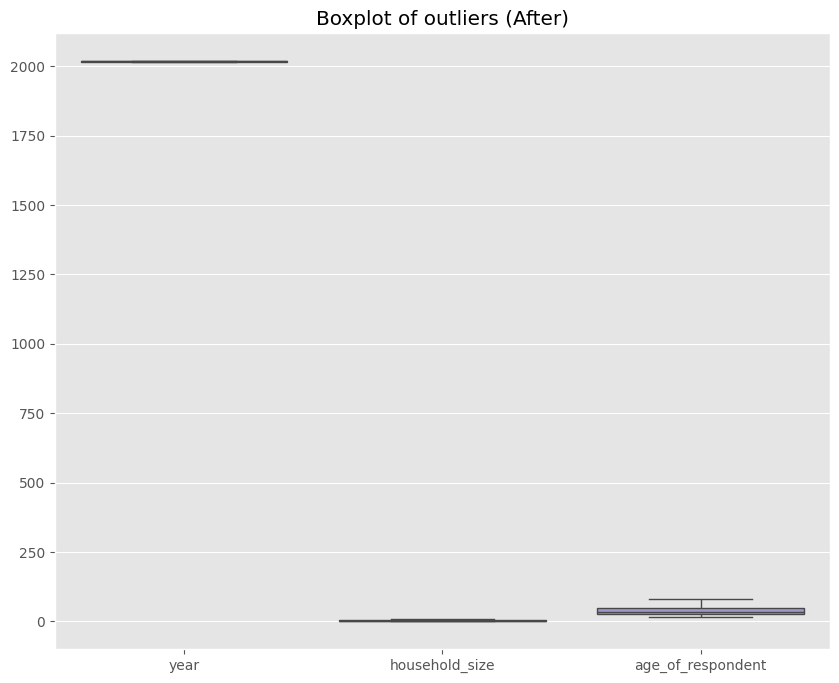

In [13]:
#visualizing data after outlier removal
plt.figure(figsize=(10,8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Boxplot of outliers (After)')
plt.show()


#Step 4: Data Visualization
- Visualizing data After Removing outliers


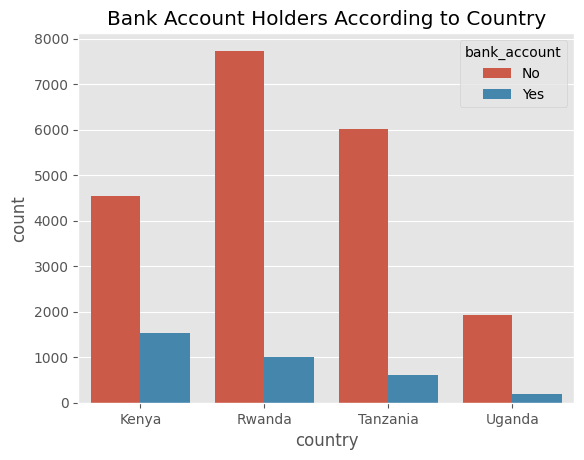

In [14]:
# visualizing  the bank account holders accordng to country

# Group the data by country and bank_account, and count the occurrences
account_counts = df.groupby(['country', 'bank_account'])['bank_account'].count().reset_index(name='count')

# Create the bar plot using the grouped data
sns.barplot(x='country', y='count', hue='bank_account', data=account_counts)
plt.title('Bank Account Holders According to Country')
plt.show()

*Kenya consists of majority of account_owners and majority of residents in Rwanda and Tanzania do not own bank accounts .*

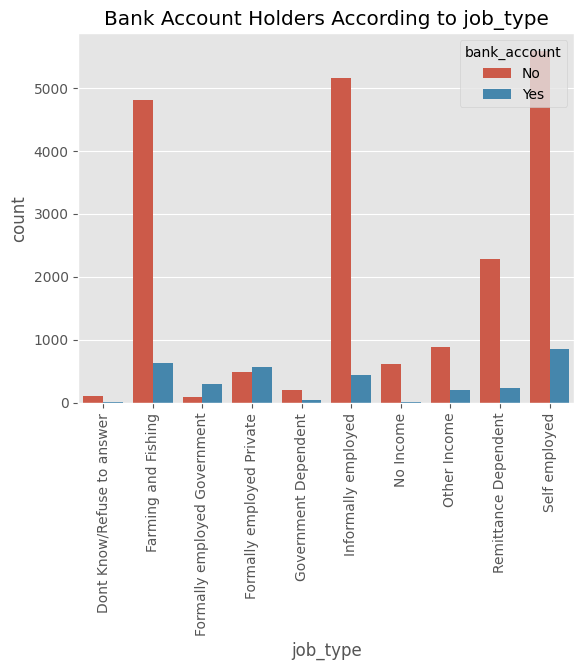

In [15]:
# Bank account holders in relation to job type
# Group the data by job_type and bank_account, and count the occurrences
account_counts = df.groupby(['job_type', 'bank_account'])['bank_account'].count().reset_index(name='count')

# Create the bar plot using the grouped data
sns.barplot(x='job_type', y='count', hue='bank_account', data=account_counts)
plt.title('Bank Account Holders According to job_type')
plt.xticks(rotation=90)
plt.show()

*Self_employed are the highest with and without Bank Accounts*

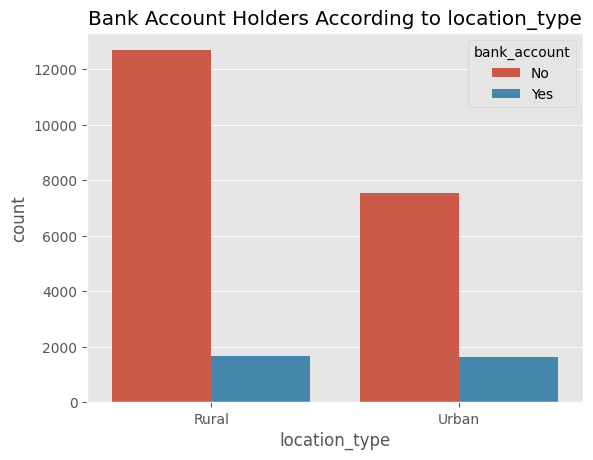

In [16]:
# bank_account by location type
# Group the data by location_type and bank_account, and count the occurrences
account_counts = df.groupby(['location_type', 'bank_account'])['bank_account'].count().reset_index(name='count')

# Create the bar plot using the grouped data
sns.barplot(x='location_type', y='count', hue='bank_account', data=account_counts)
plt.title('Bank Account Holders According to location_type')
plt.show()

*Majority of people in the Rural Areas don't have bank accounts but there is a balance on those who own accounts between the rural and urban areas.*

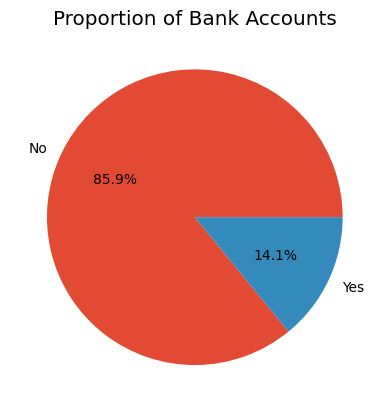

In [17]:
# value counts for each category in the 'bank_account' column
bank_account_counts = df['bank_account'].value_counts()

# Create the pie chart using the value counts
plt.pie(bank_account_counts, labels=bank_account_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Bank Accounts')
plt.show()

*Majority of this population do not own bank accounts*

#Step 5: Encoding categorical features
- Encoding Categorical Columns

In [18]:
from sklearn.preprocessing import LabelEncoder
#initializing label encoder
encoder= LabelEncoder()
# encoding the categorical columns
df['country']= encoder.fit_transform(df['country'])
df['bank_account']= encoder.fit_transform(df['bank_account'])
df['location_type']= encoder.fit_transform(df['location_type'])
df['cellphone_access']= encoder.fit_transform(df['cellphone_access'])
df['gender_of_respondent']= encoder.fit_transform(df['gender_of_respondent'])
df['relationship_with_head']= encoder.fit_transform(df['relationship_with_head'])
df['marital_status']= encoder.fit_transform(df['marital_status'])
df['education_level']= encoder.fit_transform(df['education_level'])
df['job_type']= encoder.fit_transform(df['job_type'])

In [19]:
df.dtypes

,0
country,int64
year,int64
uniqueid,object
bank_account,int64
location_type,int64
cellphone_access,int64
household_size,int64
age_of_respondent,int64
gender_of_respondent,int64
relationship_with_head,int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  int64 
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int64 
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 2.3+ MB


In [21]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,0,2018,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,0,2018,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,0,2018,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,0,2018,uniqueid_5,0,1,0,8,26,1,0,3,2,5


#Step 6: MACHINE LEARNING MODEL
- Using random forest classifier to train the machine learning model

- Defining Features & targets


In [22]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [23]:
y=df['bank_account']
x=df[['country','location_type','cellphone_access','household_size','age_of_respondent','marital_status','education_level','job_type','relationship_with_head']]

*Splitting Data into Training & test sets*

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.42,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13643, 9)
(9881, 9)
(13643,)
(9881,)


In [25]:
# using the SMOTE technique
from imblearn.over_sampling import SMOTE
#Initializing Smote
smote= SMOTE()
# fitting smote to the data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)


In [26]:
y_train_resampled.value_counts()

,count
bank_account,
0,11707
1,11707


*Scaling the data*

In [27]:
from sklearn.preprocessing import StandardScaler
# initializing standard scaler
scaler= StandardScaler()
# scaling the data
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [28]:
# checking statistics of scaled data
df.describe().T

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,count,mean,std,min,25%,50%,75%,max
country,23524.0,1.202091,0.925101,0.0,0.0,1.0,2.0,3.0
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
bank_account,23524.0,0.140792,0.347815,0.0,0.0,0.0,0.0,1.0
location_type,23524.0,0.390282,0.487824,0.0,0.0,0.0,1.0,1.0
cellphone_access,23524.0,0.741966,0.437562,0.0,0.0,1.0,1.0,1.0
household_size,23524.0,3.762795,2.117558,1.0,2.0,3.0,5.0,9.0
age_of_respondent,23524.0,38.707618,16.168969,17.0,26.0,35.0,49.0,79.0
gender_of_respondent,23524.0,0.410092,0.491861,0.0,0.0,0.0,1.0,1.0
relationship_with_head,23524.0,2.217267,1.893394,0.0,1.0,1.0,5.0,5.0
marital_status,23524.0,2.392748,0.999477,0.0,2.0,2.0,3.0,4.0


In [29]:
from sklearn.ensemble  import RandomForestClassifier
# initializing the model
model = RandomForestClassifier()
# fitting the model
model.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier()

In [30]:
# making predictions
y_pred = model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0])

#Step 7: Model performnace & Evaluation

In [31]:
# model performance
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8193502681914786
[[7597  908]
 [ 877  499]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      8505
           1       0.35      0.36      0.36      1376

    accuracy                           0.82      9881
   macro avg       0.63      0.63      0.63      9881
weighted avg       0.82      0.82      0.82      9881



#Saving the model

In [32]:
# saving the model
import joblib

# Save the model
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
! pip install streamlit

In [ ]:
import streamlit as st
import pandas as pd
import pickle

# Set page configuration
st.set_page_config(page_title="Bank Account Prediction", layout="wide")
st.title("Bank Account Prediction")

# Load the model
try:
    with open("model.pkl", "rb") as model_file:
        model = pickle.load(model_file)
        st.write(f"Loaded model type: {type(model)}")
except Exception as e:
    st.error(f"Error loading model: {e}")

# Subheader for the input form
st.subheader("Enter the following features to predict Bank account:")

# Collect user inputs for the form
country = st.selectbox("Country", ["Kenya", "Uganda", "Tanzania", "Rwanda", "Other"])
location_type = st.radio("Location Type", ["Rural", "Urban"])
cellphone_access = st.selectbox("Cellphone Accessibility", ["Yes", "No"])
household_size = st.number_input("Household Size", min_value=1, max_value=20, value=1)
age = st.number_input("Age of Respondent", min_value=18, max_value=100, value=25)
gender = st.radio("Gender of Respondent", ["Male", "Female"])
marital_status = st.selectbox("Marital Status", ["Married/Living together", "Single/Never Married", "Divorced/Separated", "Widowed"])
education_level = st.selectbox("Education Level", ["No formal education", "Primary education", "Secondary education", "Tertiary education"])
job_type = st.selectbox("Job Type", ["Self employed", "Government Dependent", "Formally employed Private", "Formally employed Government", "Other"])
relationship_with_head = st.selectbox("Relationship with Head", ["Head of Household", "Spouse", "Child", "Parent", "Other"])

# Create a DataFrame for the input
user_input = pd.DataFrame({
    'country': [country],
    'location_type': [location_type],
    'cellphone_access': [cellphone_access],
    'household_size': [household_size],
    'age_of_respondent': [age],
    'gender_of_respondent': [gender],
    'marital_status': [marital_status],
    'education_level': [education_level],
    'job_type': [job_type],
    'relationship_with_head': [relationship_with_head]
})

st.write(f"Input data shape: {user_input.shape}")

# Ensure model is correctly loaded and process prediction
if st.button("Predict"):
    try:
        if hasattr(model, "predict"):
            # Prepare input for prediction
            user_input_encoded = pd.get_dummies(user_input)
            user_input_encoded = user_input_encoded.reindex(columns=model.feature_names_in_, fill_value=0)

            prediction = model.predict(user_input_encoded)[0]
            st.write(f"Prediction: {'Has Bank Account' if prediction == 1 else 'No Bank Account'}")
        else:
            st.error("The loaded model does not appear to be valid for prediction.")
    except Exception as e:
        st.error(f"Error during prediction: {e}")

In [ ]:
# getting a public ip address
! wget -q -O - ipv4.icanhazip.com

In [ ]:
# confirming that the app.py  exists in the directory
!chmod +x app.py

In [ ]:
#run streamlit
! streamlit run app.py & npx localtunnel --port 8501